<a href="https://colab.research.google.com/github/AriannaCantarella/MLPNS2021/blob/main/Copia_di_imagesegwKM_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# your basic imports
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
pl.rcParams['font.size'] = 20
import scipy.ndimage as nd
import skimage.io as io



In [2]:
from google.colab import drive
from IPython.display import Image
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/MLPNS2021/

/content/drive/MyDrive/MLPNS2021


In [4]:
op = io.imread("kalbar_drone_190113-768x512.jpg")

In [17]:
type(op) #è un nympy array

numpy.ndarray

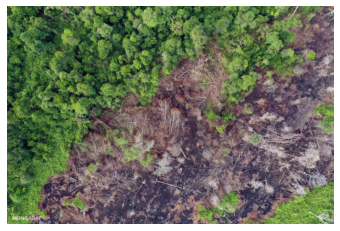

In [16]:
pl.imshow(op)   #my goal is to identify green pixel associated w/ vegetation
pl.axis("off"); #and measure the fraction of vegetation

In [6]:
from sklearn.cluster  import KMeans 

In [7]:
# make sure the image only contains 3 color channels:
op.shape  #la terza colonna indica 3 color channels

(512, 768, 3)

In [67]:
op.dtype

dtype('uint8')

In [68]:
op

array([[[ 27,  85,  26],
        [ 63, 104,  48],
        [108, 139,  80],
        ...,
        [157, 137, 126],
        [171, 158, 142],
        [158, 149, 132]],

       [[ 27,  77,  39],
        [ 39,  75,  37],
        [ 68,  96,  55],
        ...,
        [163, 140, 126],
        [174, 159, 140],
        [160, 149, 127]],

       [[  2,  43,  27],
        [  3,  34,  16],
        [ 27,  51,  27],
        ...,
        [159, 133, 116],
        [166, 148, 126],
        [160, 145, 122]],

       ...,

       [[118, 160,  58],
        [114, 159,  56],
        [126, 174,  65],
        ...,
        [138, 170, 107],
        [ 84, 114,  50],
        [ 59,  88,  24]],

       [[162, 205,  87],
        [143, 187,  72],
        [119, 168,  51],
        ...,
        [107, 144,  74],
        [110, 145,  81],
        [ 78, 109,  50]],

       [[155, 197,  89],
        [139, 182,  77],
        [125, 172,  68],
        ...,
        [ 70, 108,  51],
        [ 83, 114,  70],
        [ 68,  95,  60]]

tutte le variabili devono contare allo stesso modo, non ci deve essere una scala diversa dall'altra

I need to scale along the axis 1 (she says), i want each pixel to be scaled btween 0 and 1. Each pixel will be normalized, something w/ the colors. Red = 1, green,blue = 0. Il restante sarà un numero tra 0 e 1, cioè tra questi colori. Non ho capito perché bisogna scalare along axis = 1

k means only works w/ euclidean distance.
If i have a variance along an axis that is different from another axis one particular axis will dominate.

In [8]:
# n samples = n observations, n features = n variables
# rows * columns, 3 (??)
#voglio che risulti un floating point

adesso processa i dati non con la normalizzazione ma con minmax (????). colori nelle immagini sono definiti in un specifico range. Questo è il modo giusto per scalare le immagini, fattene una ragione

In [65]:
a = op.reshape(op.shape[0] * op.shape[1], 3)
a.shape

(393216, 3)

In [69]:
# preprocess the image with the sklearn.preprocessing.minmax_scale option: we want wach color channel to be in the range 0-1
from sklearn import preprocessing
Xopscaled = preprocessing.minmax_scale(op.reshape(op.shape[0] * op.shape[1], 3).astype(float), axis=1)
Xopscaled.reshape(op.shape)[200, 700]

array([0.37007874, 0.34117647, 0.41176471])

commento risultato 
red 0.388889
green 0
blue 1

In [70]:
Xopscaled.shape

(393216, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


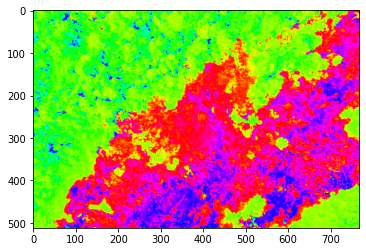

In [11]:
#show the prepreocessed image
pl.imshow(Xopscaled.reshape(op.shape));

# cluster with k-means in 2 clusters, let the center initialization be whatever sklearn think is best (kmeans++) - you want to isolate green pixels to find vegetation



what if i want to give it the cluster centers?

In [45]:
nclusters = 2 #ora metto due, cioè verde e rosso, prima lei aveva fatto 4

In [46]:
# i want my cluster centers to be this shape.....
mycenters = np.array([[1,0,0],[0,1,0]])#[0,0,1], [1,1,1]])
mycenters #initial cluster centers non è obbligatorio metterlo
#ovviamente devo creare un array non una lista

array([[1, 0, 0],
       [0, 1, 0]])

In [47]:
kmop = KMeans(n_clusters = nclusters, init = mycenters,
              random_state=302).fit(Xopscaled) #
# k-means object. hyperparameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


print the cluster cluster centers and verbalize what they represent 

In [48]:
kmop.cluster_centers_ #sempre RGB. il primo centro mi dice che ho molto rosso, poco verde e il blu è il colore
# intermedio. il secondo dice che il maggioritario è il verde, ma mi spaventa che il colore intermedio sia il rosso

array([[0.85977469, 0.05227693, 0.51592746],
       [0.40713669, 0.98468707, 0.05409162]])

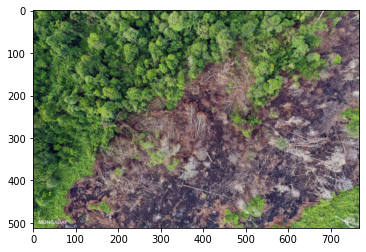

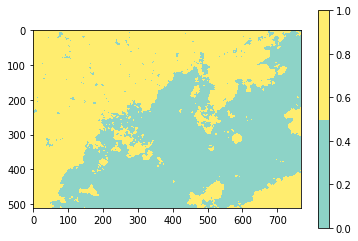

In [49]:
#plot the pixels colored by their cluster
from matplotlib import cm
pl.imshow(op)
pl.figure()
mycmap = cm.get_cmap('Set3', nclusters)
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.colorbar()

# identify from the image the cluster containing the green patch on the botton left and assuming the clustering picked up the greenery calculate the fraction of pixels containing vegetation in the image

In [62]:
print("fraction of vegetation pixel {:.3f}".format((kmop.labels_shape == 2).sum()
* 1.0 
                                                   / len(kmop.labels_))

SyntaxError: ignored

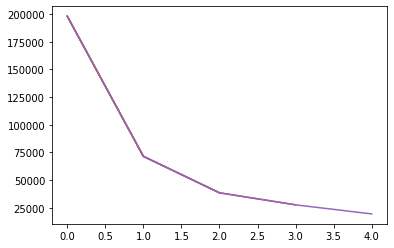

In [58]:
inertias = []
for i in range(1,6):
  kmop = KMeans(n_clusters=i, random_state=302).fit(Xopscaled)
  inertias.append(kmop.inertia_)

  pl.plot(inertias)
  #for elbow method

cluster again, with 4 clusters, but now give it the center corresponding to pure colors:
remember that each pixel color is encoded by the intensity of the R G and B channel:

pure red => RGB=[1,0,0]

pure green => RGB=[0,1,0]

pure blue => RGB=[0,0,1]

also add black: RGB=[0,0,0]

white: RGB=[1,1,1]